In [1]:
import jax
import numpyro
import numpy as np
import matplotlib.pyplot as plt
from numpyro.infer import HMC, NUTS, MCMC

def quad(x):
    return 0.5 * jax.numpy.dot(x,x)

In [2]:
x=np.array([1.0,0.5])

kernel = NUTS(potential_fn=quad, step_size=0.1)
mcmc = MCMC(kernel, num_warmup=0, num_samples=1000, num_chains=1)
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, init_params=x, extra_fields=('potential_energy',))

sample: 100%|██████████| 1000/1000 [00:02<00:00, 352.82it/s, 3 steps of size 1.00e-01. acc. prob=1.00]


In [3]:
samples = mcmc.get_samples()
samples

DeviceArray([[-1.2334093 , -0.00713078],
             [-0.89881617,  0.71260077],
             [ 0.17239521,  0.32458037],
             ...,
             [ 0.04745601,  1.4922662 ],
             [ 0.42400563,  2.7495947 ],
             [ 0.46513438,  2.7969272 ]], dtype=float32)

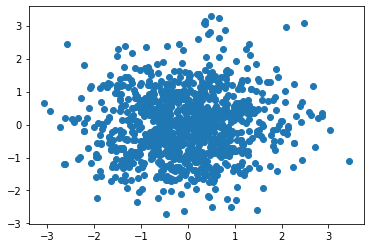

In [4]:
np.savetxt('samples.txt', samples)

plt.scatter(x=samples[:,0], y=samples[:,1])